In [238]:
import pandas as pd
import numpy as np
import pylab as pl
from __future__ import print_function
import operator
import requests
from IPython.display import HTML
import warnings
import geopandas as gpd
from fiona.crs import from_epsg
import os
import json
import sys
import statsmodels.formula.api as smf
from scipy import stats as st
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
counties = ['new_y', 'queen', 'kings', 'bronx', 'richm']
tmp= []

for boro in counties:
    html = requests.get('https://www.health.ny.gov/statistics/ny_asthma/hosp/zipcode/' + boro + '_t6.htm').content
    foo = pd.read_html(html)[0]
    foo = foo.iloc[2:]
    tmp.append(foo)
    
asthma = pd.concat(tmp, axis=0)
asthma.columns = ['ZipCode','Discharges_2012-2014','Dicharge_Rate']
asthma.reset_index(inplace=True)
asthma = asthma.drop('index', axis=1)

In [3]:
asthma['Discharges_2012-2014'] = pd.to_numeric(asthma['Discharges_2012-2014'],errors='coerce')
asthma['Dicharge_Rate']= pd.to_numeric(asthma['Dicharge_Rate'],errors='coerce')
asthma['ZipCode']= pd.to_numeric(asthma['ZipCode'],errors='coerce')
asthma = asthma.dropna()

In [4]:
asthma.head()

,ZipCode,Discharges_2012-2014,Dicharge_Rate
0,10001.0,159.0,21.9
1,10002.0,592.0,23.9
2,10003.0,130.0,7.7
6,10007.0,14.0,2.9
7,10009.0,534.0,28.3


In [105]:
asthma.to_csv('asthma.csv', encoding='utf-8')

In [5]:
lldata=pd.read_excel('nyc_benchmarking_disclosure_data_reported_in_2016.xlsx')

In [6]:
lldata.to_csv(r'nyc_benchmarking_disclosure_data_reported_in_2016.csv', encoding='utf-8')

In [7]:
df=pd.read_csv('nyc_benchmarking_disclosure_data_reported_in_2016.csv')

In [8]:
df.head()

,Unnamed: 0,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
4,4,5048763.0,5,1.003920e+09,NaN,NaN,1079685,605 East 9th ST,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,0.0,0.0,93420.0,111000.0,NaN,NaN,2016-07-28 17:28:14,NaN,NaN,NaN


In [ ]:
del df['Unnamed: 0']

# This transformation is in case your system doesn't recognize the current encoding
cols = df.columns.str.replace('\xc2\xb2', '_2')
df.columns = cols

In [10]:
df.columns

Index(['Record Number', 'Order', 'NYC Borough, Block and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identification Numbers (BINs)', 'Property Name',
       'Parent Property Id', 'Parent Property Name', 'Street Number',
       'Street Name', 'Zip Code', 'Borough',
       'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Wea

In [11]:
mydict = dict(zip(df.groupby('Primary Property Type - Self Selected')['Order'].count().index, 
         df.groupby('Primary Property Type - Self Selected')['Order'].count().values))

In [12]:
mydict

{'Adult Education': 3,
 'Ambulatory Surgical Center': 2,
 'Automobile Dealership': 6,
 'College/University': 67,
 'Courthouse': 2,
 'Data Center': 3,
 'Distribution Center': 61,
 'Enclosed Mall': 6,
 'Financial Office': 18,
 'Fitness Center/Health Club/Gym': 3,
 'Hospital (General Medical & Surgical)': 44,
 'Hotel': 236,
 'K-12 School': 91,
 'Laboratory': 3,
 'Library': 3,
 'Lifestyle Center': 1,
 'Manufacturing/Industrial Plant': 40,
 'Medical Office': 34,
 'Mixed Use Property': 75,
 'Movie Theater': 2,
 'Multifamily Housing': 8699,
 'Museum': 6,
 'Non-Refrigerated Warehouse': 177,
 'Office': 1233,
 'Other': 129,
 'Other - Education': 11,
 'Other - Entertainment/Public Assembly': 18,
 'Other - Lodging/Residential': 7,
 'Other - Mall': 8,
 'Other - Public Services': 1,
 'Other - Recreation': 1,
 'Other - Services': 4,
 'Other - Specialty Hospital': 15,
 'Outpatient Rehabilitation/Physical Therapy': 4,
 'Parking': 35,
 'Performing Arts': 5,
 'Personal Services (Health/Beauty, Dry Cleani

In [13]:
df = df[df['Primary Property Type - Self Selected'] == 'Multifamily Housing']

In [14]:
df.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
8,2792771.0,9,1.000088e+09,NaN,NaN,1087700,"Whitehall Properties, LLC",Not Applicable: Standalone Property,Not Applicable: Standalone Property,39.0,...,1116.3,625.9,169061.0,169055.0,NaN,NaN,2016-03-23 12:34:18,NaN,NaN,NaN


In [15]:
df.describe()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Street Number,Zip Code,Largest Property Use Type - Gross Floor Area (ft²),Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),...,Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),DEP Provided Water Use (kgal)
count,8.699000e+03,8699.000000,8.698000e+03,6978.000000,8487.000000,8.699000e+03,8699.000000,8699.000000,7513.000000,8654.000000,...,8.643000e+03,8.406000e+03,8.669000e+03,8.669000e+03,8.679000e+03,8.487000e+03,8.699000e+03,5.499000e+03,4956.000000,4560.000000
mean,3.476663e+06,6351.661800,2.225283e+09,1108.404271,10610.728879,1.467861e+05,1.490746,99.616623,56.629842,405.938456,...,4.536019e+06,1.280868e+06,4.093800e+03,1.628570e+03,2.462726e+03,1.405344e+05,1.499596e+05,1.193724e+04,94.932849,6801.782149
std,8.229126e+05,3267.420728,1.181873e+09,1694.046711,568.795592,2.299528e+05,4.153277,3.358280,30.477155,9520.852245,...,5.199372e+07,1.493466e+07,8.535570e+04,6.841710e+04,5.095997e+04,2.599077e+05,2.329603e+05,8.786550e+04,860.237215,7047.573041
min,1.443214e+06,1.000000,1.000088e+09,1.000000,10001.000000,5.800000e+01,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.002800e+04,5.800000e+01,0.000000e+00,0.000000,1.000000
25%,2.742914e+06,3765.000000,1.014960e+09,170.000000,10028.000000,6.510000e+04,1.000000,100.000000,32.000000,67.900000,...,9.817544e+05,2.834028e+05,3.419000e+02,2.225000e+02,8.130000e+01,6.402000e+04,6.620950e+04,3.146700e+03,35.070000,3200.725000
50%,3.114529e+06,6373.000000,2.032490e+09,520.000000,10459.000000,8.821400e+04,1.000000,100.000000,61.000000,82.900000,...,1.539532e+06,4.431600e+05,4.928000e+02,3.364000e+02,1.286000e+02,8.673400e+04,8.958000e+04,5.100200e+03,50.665000,5107.200000
75%,4.384553e+06,9181.500000,3.065408e+09,1546.750000,11226.000000,1.452840e+05,1.000000,100.000000,83.000000,101.100000,...,3.000909e+06,8.653078e+05,8.164000e+02,5.337000e+02,2.622500e+02,1.432930e+05,1.480205e+05,8.046100e+03,75.797500,7995.950000
max,5.053345e+06,11971.000000,5.054918e+09,76179.000000,11694.000000,6.940450e+06,161.000000,100.000000,100.000000,801504.700000,...,3.729784e+09,1.093137e+09,5.860677e+06,5.852949e+06,2.193799e+06,8.512479e+06,6.940450e+06,3.638813e+06,52143.200000,129781.600000


In [16]:
print ("Are there missing values? -->", df['Site EUI (kBtu/ft²)'].isnull().values.any())
print ("There are %i missing values out of %i properties (%.1f percent)" %(df['Site EUI (kBtu/ft²)'].isnull().sum(), 
                                                                        len(df), 
                                                                        df['Site EUI (kBtu/ft²)'].isnull().sum()
                                                                          /float(len(df))*100))

Are there missing values? --> True
There are 45 missing values out of 8699 properties (0.5 percent)


In [17]:
# Drop nans
df = df.dropna(subset=['Site EUI (kBtu/ft²)'])
print ('Examples after dropping NaNs:', len(df))

Examples after dropping NaNs: 8654


In [18]:
# Drop zero EUI values
df = df[df['Site EUI (kBtu/ft²)']>0]
print ('Examples after dropping zeros:', len(df))

Examples after dropping zeros: 8652


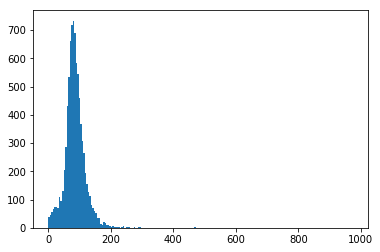

In [19]:
#plt.hist(df['Site EUI (kBtu/ft_2)'], bins=200)
plt.hist(df['Site EUI (kBtu/ft²)'][df['Site EUI (kBtu/ft²)']<1000], bins=200)
plt.show()

In [20]:
def clean(df):
    """Takes the logarithm of EUI for a particular building type and filters out
    examples that fall outside the threshold of two standard deviations.
    
    Returns outlier-free dataframe."""
    
    df = df[(df.log_eui<np.mean(df.log_eui)+2*np.std(df.log_eui))&(df.log_eui>np.mean(df.log_eui)-2*np.std(df.log_eui))]
    return df

df['eui'] = df['Site EUI (kBtu/ft²)']
df['log_eui'] = np.log10(df.eui)
df = clean(df)
print ('Examples after cleaning EUI:', len(df))

Examples after cleaning EUI: 8369


In [21]:
df['Site EUI (kBtu/ft²)'].describe()

count    8369.000000
mean       87.188804
std        29.988660
min        21.000000
25%        69.200000
50%        83.400000
75%       101.300000
max       304.800000
Name: Site EUI (kBtu/ft²), dtype: float64

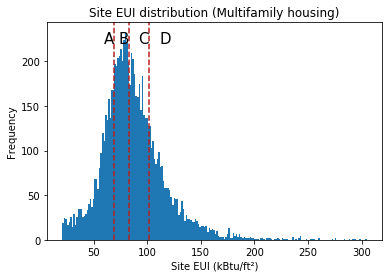

In [22]:
plt.hist(df['Site EUI (kBtu/ft²)'], bins=200)
for label, pos in zip(['A', 'B', 'C'], df['Site EUI (kBtu/ft²)'].describe()[4:7].values):
    plt.axvline(x=pos, color='firebrick', linestyle='--')
    plt.text(pos-10, 220, label, fontsize=15)
plt.text(pos+10, 220, 'D', fontsize=15)
plt.title('Site EUI distribution (Multifamily housing)')
plt.xlabel('Site EUI (kBtu/ft²)')
plt.ylabel('Frequency')
plt.show()

In [23]:
data= pd.merge(df, asthma, left_on=df['Zip Code'], right_on= asthma.ZipCode)

In [24]:
data.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method,eui,log_eui,ZipCode,Discharges_2012-2014,Dicharge_Rate
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,NaN,2016-04-13 11:08:48,NaN,NaN,NaN,73.7,1.867467,10002.0,592.0,23.9
1,2679444.0,320,1.002430e+09,NaN,NaN,1077586;1077587,DEPM 2502 - 645-675 Water St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,645.0,...,NaN,2016-07-31 17:10:33,NaN,NaN,NaN,92.0,1.963788,10002.0,592.0,23.9
2,2679425.0,321,1.002440e+09,NaN,NaN,1003141;1805579,DEPM 2502 - 605 Water St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,605.0,...,NaN,2016-07-31 17:10:33,NaN,NaN,NaN,92.0,1.963788,10002.0,592.0,23.9
3,2658891.0,322,1.002440e+09,NaN,NaN,1078940,Gouverneur,Not Applicable: Standalone Property,Not Applicable: Standalone Property,621.0,...,73.67,2016-04-04 13:01:35,4726.6,Eligible,ABS,108.7,2.036230,10002.0,592.0,23.9
4,4414974.0,324,1.002470e+09,NaN,NaN,1077589;1077590,CC NEW - 265-275 Cherry Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,251.0,...,NaN,2016-07-31 17:10:33,NaN,NaN,NaN,82.2,1.914872,10002.0,592.0,23.9


In [25]:
def clean(data):
    """Takes the logarithm of EUI for a particular building type and filters out
    examples that fall outside the threshold of two standard deviations.
    
    Returns outlier-free dataframe."""
    
    data = data[(data.dis<np.mean(data.dis)+2*np.std(data.dis))&(data.dis>np.mean(data.dis)-2*np.std(data.dis))]
    return data

#df['eui'] = df['Site EUI (kBtu/ft²)']
#df['log_eui'] = np.log10(df.eui)
data['dis']=data['Discharges_2012-2014']
data = clean(data)
print ('Examples after cleaning EUI:', len(data))

Examples after cleaning EUI: 7557


In [29]:
census=pd.read_csv('Census tract data.csv')

In [30]:
census.head()

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,INTPTLAT10,INTPTLON10,State,COUNTY,HH_COUNT,...,MSMOC_TOT_,TAX_RET,Avg_TransC,REtaxperow,DISP_INC,energy_cos,REtax_ACS,AVG_TTL,LOCALNAME,Shape_Area
0,0,34,17,32400,34017032400,40.792844,-74.013482,New Jersey,Hudson County,2187,...,22740,2264.889916,4145.566539,4966.370331,12232.00950,1773.280152,7735,5007.444405,West New York Town,0.000036
1,1,34,17,10100,34017010100,40.691559,-74.110913,New Jersey,Hudson County,2255,...,27804,2363.430717,5969.286255,4490.984109,22077.84024,1876.844806,7917,6146.888195,Bayonne City,0.000106
2,2,34,17,10200,34017010200,40.682103,-74.104573,New Jersey,Hudson County,1218,...,28068,1260.718928,6014.489564,3339.224580,20488.60531,2167.175106,7692,6193.436421,Bayonne City,0.000031
3,3,34,17,10300,34017010300,40.672439,-74.081016,New Jersey,Hudson County,1093,...,22620,1229.562591,4798.787758,3793.386763,15514.61337,2163.964082,7831,4941.564294,Bayonne City,0.000108
4,4,34,17,10400,34017010400,40.670599,-74.089940,New Jersey,Hudson County,1571,...,20724,2209.874484,7611.970058,4478.110461,35131.00534,2114.480847,7918,7838.446154,Bayonne City,0.000234


In [31]:
zip_tract=pd.read_excel('ZIP_TRACT_122016.xlsx')

In [32]:
zip_tract.to_csv('ZIP_TRACT_122016.csv',encoding='utf-8')

In [33]:
zip_tract=pd.read_csv('ZIP_TRACT_122016.csv')
del zip_tract['Unnamed: 0']
zip_tract.head()

,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,501,36103158607,0.000000,1.000000,0.000000,1.000000
1,601,72001956600,0.136735,0.358911,0.347222,0.154270
2,601,72001956700,0.859996,0.636139,0.652778,0.842387
3,601,72001956300,0.003269,0.004950,0.000000,0.003343
4,602,72003430300,0.037744,0.272500,0.315789,0.055036


In [34]:
tract=pd.merge(census,zip_tract,left_on=census.GEOID10, right_on=zip_tract.TRACT)

In [35]:
tract.head()

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,INTPTLAT10,INTPTLON10,State,COUNTY,HH_COUNT,...,REtax_ACS,AVG_TTL,LOCALNAME,Shape_Area,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,0,34,17,32400,34017032400,40.792844,-74.013482,New Jersey,Hudson County,2187,...,7735,5007.444405,West New York Town,0.000036,7093,34017032400,0.084513,0.098403,0.107687,0.087397
1,1,34,17,10100,34017010100,40.691559,-74.110913,New Jersey,Hudson County,2255,...,7917,6146.888195,Bayonne City,0.000106,7002,34017010100,0.078836,0.059420,0.090999,0.078735
2,2,34,17,10200,34017010200,40.682103,-74.104573,New Jersey,Hudson County,1218,...,7692,6193.436421,Bayonne City,0.000031,7002,34017010200,0.041207,0.054106,0.052094,0.043030
3,3,34,17,10300,34017010300,40.672439,-74.081016,New Jersey,Hudson County,1093,...,7831,4941.564294,Bayonne City,0.000108,7002,34017010300,0.042147,0.053623,0.043851,0.043030
4,3,34,17,10300,34017010300,40.672439,-74.081016,New Jersey,Hudson County,1093,...,7831,4941.564294,Bayonne City,0.000108,7305,34017010300,0.000000,0.000823,0.000000,0.000037


In [317]:
new=pd.DataFrame()

In [318]:
new['log_eui'] = df.log_eui.groupby(df['Zip Code']).sum()

In [319]:
df = df.dropna(subset=['log_wea_eui'])


In [291]:
new = new.drop('log_wea_eui', axis=1)

In [320]:
df['log_wea_eui'] = np.log10(df['Weather Normalized Site EUI (kBtu/ft²)'])

In [321]:
new['log_wea_eui'] = df['log_wea_eui'].groupby(df['Zip Code']).mean()

In [322]:
new['Zip'] = new.index.values
new['Zip'] = new.Zip.astype(int)

In [323]:
new= pd.merge(new, asthma, left_on=new.Zip, right_on= asthma.ZipCode)
asthma.ZipCode = asthma.ZipCode.astype(int)

In [324]:
new = new.drop('Zip',axis=1)

In [325]:
new.log_eui.describe()

count    158.000000
mean      85.005754
std       86.983096
min        1.359835
25%       18.693354
50%       48.464829
75%      128.881386
max      391.254258
Name: log_eui, dtype: float64

In [326]:
new.head()

,log_eui,log_wea_eui,ZipCode,Discharges_2012-2014,Dicharge_Rate
0,98.259568,1.852099,10001,159.0,21.9
1,72.200837,1.952868,10002,592.0,23.9
2,185.082917,1.906020,10003,130.0,7.7
3,37.209553,1.856887,10007,14.0,2.9
4,37.517881,1.876580,10009,534.0,28.3


In [327]:
len(new)


158

In [328]:
census_new= pd.merge(census,zip_tract,left_on=census.GEOID10, right_on=zip_tract.TRACT)

In [329]:
census_new = census_new.groupby(census_new.ZIP).sum()

In [330]:
census_new['ZIP'] = census_new.index.values

In [331]:
census_new.head()

,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,INTPTLAT10,INTPTLON10,HH_COUNT,OHU_OWN,OHU_RENT,...,energy_cos,REtax_ACS,AVG_TTL,Shape_Area,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
ZIP,,,,,,,,,,,,,,,,,,,,,
501,4351,36,103,158607,36103158607,40.817951,-73.038977,1187,777,297,...,2378.250015,4594,8449.026580,0.000302,501,36103158607,0.0,1.0,0.0,1.0
6018,5078,9,5,260200,9005260200,42.022215,-73.295716,1400,1082,443,...,2167.733657,3096,4884.121737,0.005482,6018,9005260200,1.0,1.0,1.0,1.0
6021,5061,9,5,293100,9005293100,42.005373,-73.063732,589,515,39,...,2528.112632,4365,8451.311420,0.009266,6021,9005293100,1.0,1.0,1.0,1.0
6024,5078,9,5,260200,9005260200,42.022215,-73.295716,1400,1082,443,...,2167.733657,3096,4884.121737,0.005482,6024,9005260200,1.0,1.0,1.0,1.0
6031,20328,36,20,1210100,36021210100,167.833296,-293.287725,5024,3691,1349,...,9353.285014,15257,37423.431346,0.057802,6031,36021210100,1.0,1.0,1.0,1.0


In [332]:
new = pd.merge(new, census_new, left_on=new.ZipCode, right_on=census_new.ZIP)

In [333]:
new.head()

,log_eui,log_wea_eui,ZipCode,Discharges_2012-2014,Dicharge_Rate,FID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,...,energy_cos,REtax_ACS,AVG_TTL,Shape_Area,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,98.259568,1.852099,10001,159.0,21.9,22335,432,732,111700,432732111700,...,18346.012429,75321,244759.519131,0.000315,10001,432732111700,1.0,1.0,1.0,1.0
1,72.200837,1.952868,10002,592.0,23.9,32663,648,1098,31316,649098031316,...,27000.431162,56195,112704.725636,0.000304,10002,649098031316,1.0,1.0,1.0,1.0
2,185.082917,1.906020,10003,130.0,7.7,24267,468,793,66704,468793066704,...,18928.354716,86857,288768.786820,0.000206,10003,468793066704,1.0,1.0,1.0,1.0
3,37.209553,1.856887,10007,14.0,2.9,11255,216,366,44403,216366044403,...,10363.953190,37732,184973.618569,0.000175,10007,216366044403,1.0,1.0,1.0,1.0
4,37.517881,1.876580,10009,534.0,28.3,23923,468,793,36610,468793036610,...,19978.512402,27207,118483.489722,0.000222,10009,468793036610,1.0,1.0,1.0,1.0


In [334]:
len(new)

158

In [363]:
lm2= smf.ols(formula= "Dicharge_Rate ~ log_wea_eui ",data=new).fit()

In [364]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Dicharge_Rate   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.913
Date:                Mon, 13 Nov 2017   Prob (F-statistic):             0.0898
Time:                        15:37:12   Log-Likelihood:                -688.75
No. Observations:                 158   AIC:                             1381.
Df Residuals:                     156   BIC:                             1388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -32.6729     34.085     -0.959      0.339    -100.000      34.654
log_wea_eui    30.5594     17.904      1.707      0.090      -4.807      65.926
==============================================================================
Omnibus:                       34.624   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.235
Skew:                           1.251   Prob(JB):                     2.04e-11
Kurtosis:                       4.103   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

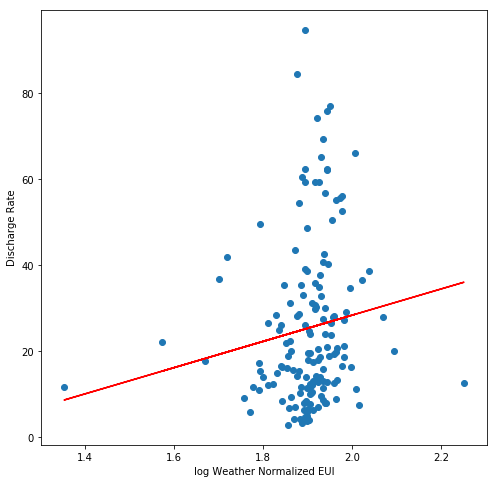

In [367]:
plt.figure(figsize=(8,8))
plt.scatter(new['log_wea_eui'],new['Dicharge_Rate'])

plt.plot(new['log_wea_eui'], lm2.predict(), c="r")
plt.xlabel('log Weather Normalized EUI')
plt.ylabel('Discharge Rate')

#### This plot gives us the information about the correlation between Discharge as recorded by the hospital per zip code and the log of weather normlaized EUI (kBtu/ft²) per zip. We can see from the plot that the two variables are positively correlated although not so strong because of low R square value.

In [339]:
new['log_mhi'] = np.log10(new.MHI)

In [340]:
len(lm2.predict())

158

In [341]:
lm3= smf.ols(formula= "log_wea_eui ~ log_mhi ",data=new).fit()

In [342]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_wea_eui   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.609
Date:                Mon, 13 Nov 2017   Prob (F-statistic):              0.207
Time:                        15:24:40   Log-Likelihood:                 166.84
No. Observations:                 158   AIC:                            -329.7
Df Residuals:                     156   BIC:                            -323.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0862      0.145     14.340      0.000       1.799       2.374
log_mhi       -0.0312      0.025     -1.268      0.207      -0.080       0.017
==============================================================================
Omnibus:                       92.157   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.743
Skew:                          -1.801   Prob(JB):                    6.91e-234
Kurtosis:                      15.252   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

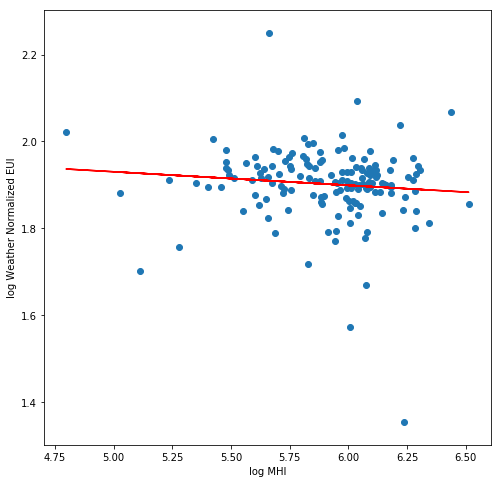

In [365]:
plt.figure(figsize=(8,8))
plt.scatter(new['log_mhi'],new['log_wea_eui'])

plt.plot(new['log_mhi'],lm3.predict(),  c="r")
plt.xlabel('log MHI')
plt.ylabel('log Weather Normalized EUI')

#### This plot gives us the information about the relationship between the weather normalized EUI (kBtu/ft²) and log of Median Household Income. From the plot, we can see that the two varibales are negatively correlated although not so strongly because of low R square value.

In [222]:
nyc = gpd.read_file(r'ZIP_CODE_040114.shp')

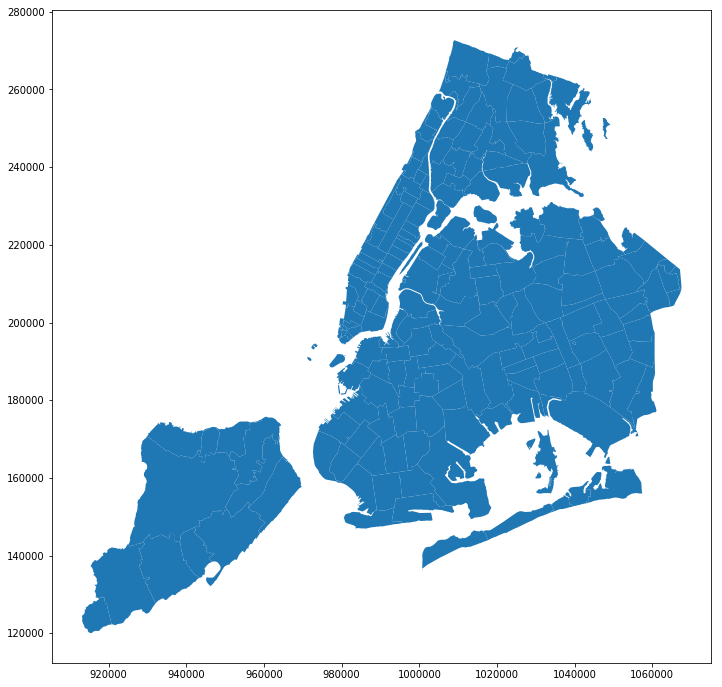

In [225]:
nyc.plot(figsize=(12,12))

In [231]:
nyc['Zip Code']=nyc.ZIPCODE.astype(int)

In [359]:
mapData = pd.merge(nyc,new, left_on=nyc['Zip Code'], right_on=new.ZipCode)

In [360]:
mapData.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,REtax_ACS,AVG_TTL,Shape_Area,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO,log_mhi
0,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,59010,57359.891258,0.000402,11213,793034727800,1.0,1.0,1.0,1.0,5.883015
1,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,52436,68518.309721,0.000679,11212,1081412448702,1.0,1.0,1.0,1.0,6.011638
2,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,47462,59262.495632,0.000560,11225,648846941204,1.0,1.0,1.0,1.0,5.831812
3,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,75224,147217.572064,0.001021,11218,1009317322302,1.0,1.0,1.0,1.0,6.101864
4,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,67792,96628.141619,0.000749,11226,1045364998519,1.0,1.0,1.0,1.0,6.058437


In [239]:
mapData.crs = from_epsg(4326)
mapData['geometry'] = nyc.to_crs(epsg=2263).geometry

In [240]:
mapData = gpd.GeoDataFrame(mapData)

/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


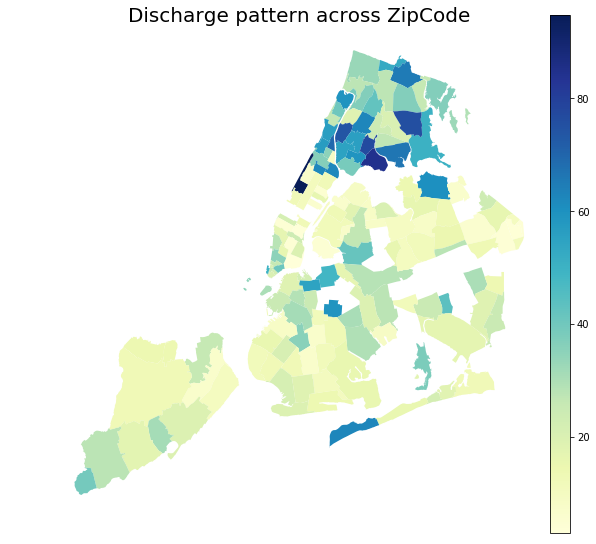

In [356]:
ax= mapData.plot(figsize=(9,9),column='Dicharge_Rate',colormap='YlGnBu')
vmin,vmax= min(mapData.Dicharge_Rate.values), max(mapData.Dicharge_Rate.values)
ax.axis('off')
ax.set_title('Discharge pattern across ZipCode',size=20)
fig = ax.get_figure()
cax = fig.add_axes([0.9,0.1,0.03,0.8])

sm= pl.cm.ScalarMappable(cmap='YlGnBu',norm=pl.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
fig.colorbar(sm, cax=cax)

### Discharge rate of asthma patients in the city grouped by zip code

/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


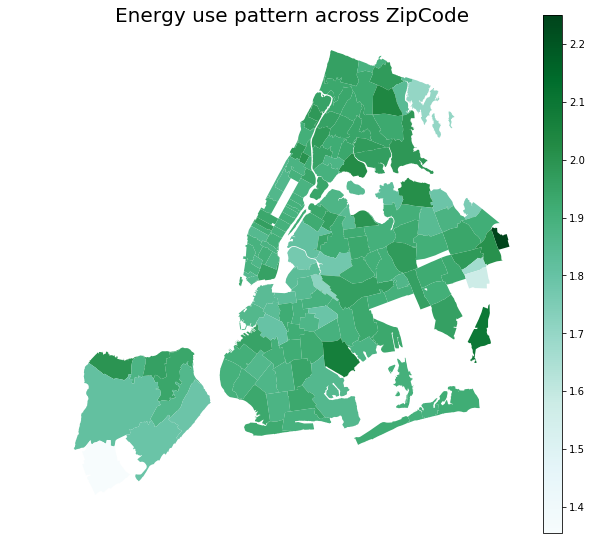

In [369]:
ax= mapData.plot(figsize=(9,9),column='log_wea_eui',colormap='BuGn')
vmin,vmax= min(mapData.log_wea_eui.values), max(mapData.log_wea_eui.values)
ax.axis('off')
ax.set_title('Energy use pattern across ZipCode',size=20)
fig = ax.get_figure()
cax = fig.add_axes([0.9,0.1,0.03,0.8])

sm= pl.cm.ScalarMappable(cmap='BuGn',norm=pl.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
fig.colorbar(sm, cax=cax)

### Energy Use pattern across the city grouped by zip code